In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xlwt
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

In [2]:
def exponential_smoothing_1(alpha, data):
    '''
    一次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回一次指数平滑值：list
    '''
    s_single=[]
    s_single.append(data[0])
    for i in range(1, len(data)):
        s_single.append(alpha * data[i] + (1 - alpha) * s_single[i-1])
    return s_single

In [3]:
def exponential_smoothing_2(alpha, data):
    '''
    二次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回二次指数平滑值,参数a, b：list
    '''
    s_single = exponential_smoothing_1(alpha, data)
    s_double = exponential_smoothing_1(alpha, s_single)
    a_double = [0 for i in range(len(data))]
    b_double = [0 for i in range(len(data))]
    F_double = [0 for i in range(len(data))]
    for i in range(len(data)):
        a = 2 * s_single[i] - s_double[i]
        b = (alpha / (1 - alpha)) * (s_single[i] - s_double[i])
        F = a + b
        a_double[i] = a
        b_double[i] = b
        F_double[i] = F
    return a_double,b_double,F_double

In [4]:
def exponential_smoothing_3(alpha, data):
    '''
    三次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回二次指数平滑值，参数a, b, c，预测值Ft+1：list
    '''
    s_single = exponential_smoothing_1(alpha, data)
    s_double = exponential_smoothing_1(alpha, s_single)
    s_triple = exponential_smoothing_1(alpha, s_double)
    
    a_triple = [0 for i in range(len(data))]
    b_triple = [0 for i in range(len(data))]
    c_triple = [0 for i in range(len(data))]
    F_triple = [0 for i in range(len(data))]
    for i in range(len(data)):
        a = 3 * s_single[i] - 3 * s_double[i] + s_triple[i]
        b = (alpha / (2 * ((1 - alpha) ** 2))) * ((6 - 5 * alpha) * s_single[i] - 2 * ((5 - 4 * alpha) * s_double[i]) + (4 - 3 * alpha) * s_triple[i])
        c = ((alpha ** 2) / (2 * ((1 - alpha) ** 2))) * (s_single[i] - 2 * s_double[i] + s_triple[i])
        F = a + b + c
        a_triple[i] = a
        b_triple[i] = b
        c_triple[i] = c
        F_triple[i] = F
    return a_triple, b_triple, c_triple, F_triple

In [5]:
def model_error_analysis(F, data):
    '''
    误差分析
    :param F:     预测数列：list
    :param data:  原始序列：list
    :return:      返回各期绝对误差，相对误差：list，返回平均绝对误差和平均相对误差
    '''
    AE = [0 for i in range(len(data)-1)]
    RE = []
    AE_num = 0
    RE_num = 0
    for i in range(1,len(data)):
        _AE = abs(F[i-1] - data[i])
        _RE = _AE / data[i]
        AE_num += _AE
        RE_num += _RE
        AE[i-1] = _AE
        RE.append('{:.2f}%'.format(_RE*100))
    MAE = AE_num / (len(data)-1)
    MRE = '{:.2f}%'.format(RE_num *100 / (len(data)-1))
    return AE, MAE, RE, MRE

In [6]:
def alpha_analysis(data,itype=2):
    '''
    判断误差最小的平滑系数
    :param data:   原始序列：list
    :param itype:  平滑类型：1,2,3
    :return:       返回平均绝对误差最小的平滑系数和最小平均绝对误差
    '''
    alpha_all = [0.01 * i for i in range(1,100)]  #只需要0.1-0.9修改为alpha_triple = [0.1 * i for i in range(1,10)]
    best_alpha = 0
    min_MAE = float('Inf') #  无穷大
    if itype == 2:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            a_double,b_double,F_double = exponential_smoothing_2(alpha, data)
            AE_double, MAE_double, RE_double, MRE_double = model_error_analysis(F_double, data)
            if MAE_double <= min_MAE:
                min_MAE = MAE_double
                best_alpha = alpha
            else:
                pass
    elif itype == 3:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            a_triple, b_triple, c_triple, F_triple = exponential_smoothing_3(alpha, data)
            AE_triple, MAE_triple, RE_triple, MRE_triple = model_error_analysis(F_triple, data)
            if MAE_triple <= min_MAE:
                min_MAE = MAE_triple
                best_alpha = alpha
            else:
                pass
    else:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            F_single = exponential_smoothing_1(alpha, data)
            AE_single, MAE_single, RE_single, MRE_single = model_error_analysis(F_single, data)
            if MAE_single <= min_MAE:
                min_MAE = MAE_single
                best_alpha = alpha
            else:
                pass
    
    return best_alpha, min_MAE

In [7]:
def scatter_diagram(F, data, t):
    '''
    绘制散点图
    :param F:     预测序列：list
    :param data:  原始类型：list
    :param t:     时间类型：list
    '''
    F = F[:-1:]
    data = data[1::]
    t = t[1::]
    plt.title("散点图",fontsize=20)  #图表名称
    plt.xlabel("年份", fontsize=12)  #改x坐标轴标题
    plt.ylabel("货邮吞吐量（千吨）", fontsize=12)  #改y坐标轴标题
    plt.scatter(t, data, label='实际值',s=10)
    plt.scatter(t, F, marker = 'x', label='预测值',s=10)
    plt.legend()
    plt.savefig('散点图.png', bbox_inches='tight',dpi = 300)
    plt.show()

In [8]:
def line_chart(F, data, t):
    '''
    绘制折现图
    :param F:     预测序列：list
    :param data:  原始类型：list
    :param t:     时间类型：list
    '''
    F = F[:-1:]
    data = data[1::]
    t = t[1::]
    plt.title("对比曲线",fontsize=20)
    plt.xlabel("年份", fontsize=12)
    plt.ylabel("货邮吞吐量（千吨）", fontsize=12)
    plt.plot(t, data, label='实际值')
    plt.plot(t, F, label='预测值')
    plt.legend()
    plt.savefig('折线图.png', bbox_inches='tight',dpi = 300)
    plt.show()

In [9]:
def write_xls(alpha, data, t):
    '''
    写入表格
    :param alpha:  平滑系数
    :param data:   原始类型：list
    :param t:      时间类型：list
    '''
    workbook = xlwt.Workbook()
    worksheet_1 = workbook.add_sheet('二次指数平滑')
    worksheet_2 = workbook.add_sheet('三次指数平滑')
    
    s_single = exponential_smoothing_1(alpha, data)
    s_double = exponential_smoothing_1(alpha, s_single)
    s_triple = exponential_smoothing_1(alpha, s_double)
    
    a_double,b_double,F_double = exponential_smoothing_2(alpha, data)
    AE_double, MAE_double, RE_double, MRE_double = model_error_analysis(F_double, data)
    title_1 = ['时间', 't', '实际值', '一次指数平滑值', '二次指数平滑值', 'a', 'b', 'F', '绝对误差', '相对误差']
    col = 0
    for w in title_1:
        worksheet_1.write(0,col,w)
        col += 1
    worksheet_1.write(1,0,t[0])
    worksheet_1.write(1,1,1)
    worksheet_1.write(1,2,data[0])
    worksheet_1.write(1,3,s_single[0])
    worksheet_1.write(1,4,s_double[0])
    worksheet_1.write(1,5,a_double[0])
    worksheet_1.write(1,6,b_double[0])
    row = 2
    for i in range(1,len(data)):
        worksheet_1.write(row,0,t[i])
        worksheet_1.write(row,1,i+1)
        worksheet_1.write(row,2,data[i])
        worksheet_1.write(row,3,s_single[i])
        worksheet_1.write(row,4,s_double[i])
        worksheet_1.write(row,5,a_double[i])
        worksheet_1.write(row,6,b_double[i])
        worksheet_1.write(row,7,F_double[i-1])
        worksheet_1.write(row,8,AE_double[i-1])
        worksheet_1.write(row,9,RE_double[i-1])
        row += 1
    worksheet_1.write_merge(row, row, 0, 8, '平均绝对误差')
    worksheet_1.write_merge(row + 1, row + 1, 0, 8, '平均相对误差')
    worksheet_1.write(row,9,MAE_double)
    worksheet_1.write(row + 1,9,MRE_double)
    
    
    a_triple, b_triple, c_triple, F_triple = exponential_smoothing_3(alpha, data)
    AE_triple, MAE_triple, RE_triple, MRE_triple = model_error_analysis(F_triple, data)
    title_2 = ['时间', 't', '实际值', '一次指数平滑值', '二次指数平滑值', '三次指数平滑值', 'a', 'b', 'c', 'F', '绝对误差', '相对误差']
    col = 0
    for w in title_2:
        worksheet_2.write(0,col,w)
        col += 1
    worksheet_2.write(1,0,t[0])
    worksheet_2.write(1,1,1)
    worksheet_2.write(1,2,data[0])
    worksheet_2.write(1,3,s_single[0])
    worksheet_2.write(1,4,s_double[0])
    worksheet_2.write(1,5,s_triple[0])
    worksheet_2.write(1,6,a_triple[0])
    worksheet_2.write(1,7,b_triple[0])
    worksheet_2.write(1,8,c_triple[0])
    row = 2
    for i in range(1,len(data)):
        worksheet_2.write(row,0,t[i])
        worksheet_2.write(row,1,i+1)
        worksheet_2.write(row,2,data[i])
        worksheet_2.write(row,3,s_single[i])
        worksheet_2.write(row,4,s_double[i])
        worksheet_2.write(row,5,s_triple[i])
        worksheet_2.write(row,6,a_triple[i])
        worksheet_2.write(row,7,b_triple[i])
        worksheet_2.write(row,8,c_triple[i])
        worksheet_2.write(row,9,F_triple[i-1])
        worksheet_2.write(row,10,AE_triple[i-1])
        worksheet_2.write(row,11,RE_triple[i-1])
        row += 1
    worksheet_2.write_merge(row, row, 0, 10, '平均绝对误差')
    worksheet_2.write_merge(row + 1, row + 1, 0, 10, '平均相对误差')
    worksheet_2.write(row, 11, MAE_triple)
    worksheet_2.write(row + 1, 11, MRE_triple)
    workbook.save('指数平滑预测.xls')

## 使用方法

定义数据和时间

In [10]:
t = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
data = [22.938,31.227,35.711,38.772,41.233,43.033,49.683,59.278,63.845,75.295]

是否寻找平均绝对误差最小的平滑系数<br>itype取值为1,2,3，分别代表一次、二次、三次指数平滑<br>返回最优的平滑系数以及最小平均绝对误差

In [11]:
alpha_analysis(data,itype=1)

(0.99, 5.86330343864394)

In [12]:
alpha_analysis(data,itype=2)

(0.56, 3.3794655525358674)

In [13]:
alpha_analysis(data,itype=3)

(0.34, 3.3621142550224645)

定义平滑系数，分别进行一次，二次，三次指数平滑<br>分别返回：<br>一次指数平滑值<br>二次指数平滑参数a,b及预测值F<br>三次指数平滑参数a,b,c及预测值F

In [14]:
alpha = 0.6

exponential_smoothing_1(alpha, data)

[22.938,
 27.9114,
 32.59116,
 36.299664,
 39.2596656,
 41.52366624,
 46.419266496,
 54.1345065984,
 59.96080263936,
 69.161321055744]

In [15]:
exponential_smoothing_2(alpha, data)

([22.938,
  29.900760000000002,
  35.258808,
  38.850124799999996,
  41.46385056,
  43.31094048,
  49.0924162944,
  58.28986255872,
  63.953463439871996,
  74.4385927425024],
 [0.0,
  2.9840400000000016,
  4.001471999999999,
  3.825691199999994,
  3.3062774399999983,
  2.6809113600000027,
  4.009724697600006,
  6.233033940480001,
  5.988991200767997,
  7.915907530137594],
 [22.938,
  32.884800000000006,
  39.26028,
  42.67581599999999,
  44.77012799999999,
  45.99185184,
  53.10214099200001,
  64.5228964992,
  69.94245464064,
  82.35450027263998])

In [16]:
exponential_smoothing_3(alpha, data)

([22.938,
  30.696503999999997,
  35.8484208,
  39.03909503999999,
  41.40092831999999,
  43.11900729600001,
  49.369993244160014,
  58.993775803392,
  64.1699506738176,
  75.03903199057918],
 [0.0,
  6.266483999999973,
  6.433624799999967,
  4.60519343999997,
  3.046723199999989,
  1.8891869760000009,
  5.154729615360027,
  9.136676074752026,
  6.882001040793558,
  10.39271942845433],
 [0.0,
  0.8952119999999988,
  0.6633143999999972,
  0.21259151999999565,
  -0.07078751999999876,
  -0.21592483199999174,
  0.3122740684800122,
  0.7919024002560019,
  0.24354813818879956,
  0.6754941540863956],
 [22.938,
  37.85819999999997,
  42.945359999999965,
  43.85687999999996,
  44.37686399999998,
  44.79226944000001,
  54.836996928000055,
  68.92235427840004,
  71.29549985279995,
  86.1072455731199])

误差分析,返回各期绝对误差、平均绝对误差、相对误差、平均相对误差

In [17]:
a,b,F = exponential_smoothing_2(alpha, data)
model_error_analysis(F, data)

([8.289000000000001,
  2.826199999999993,
  0.48828000000000316,
  1.4428159999999934,
  1.7371279999999913,
  3.6911481599999973,
  6.175859007999989,
  0.6778964992000027,
  5.352545359360008],
 3.408985891839998,
 ['26.54%',
  '7.91%',
  '1.26%',
  '3.50%',
  '4.04%',
  '7.43%',
  '10.42%',
  '1.06%',
  '7.11%'],
 '7.70%')

输出二次、三次指数平滑结果到excel表

In [18]:
write_xls(alpha, data, t)

绘图，可输出折线图和散点图

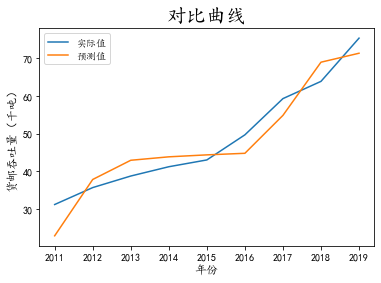

In [19]:
a_triple, b_triple, c_triple, F_triple = exponential_smoothing_3(alpha, data)
line_chart(F_triple, data, t)

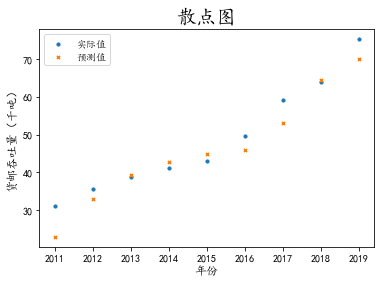

In [20]:
a_double,b_double,F_double = exponential_smoothing_2(alpha, data)
scatter_diagram(F_double, data, t)